In [ ]:
from time import process_time
t1_start = process_time()

In [ ]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
os.getcwd() # get the current working directory

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_folder = '/content/drive/MyDrive/MATH_6373/MATH_6373_HW_02/'
os.chdir(base_folder) # change the current working directory to

base_name = ['CENTURY', 'CONSOLAS', 'ISOC'] 

for value in base_name:
  exec("{x} = pd.read_csv(f'{x}.csv')".format(x = value))

In [ ]:
CL1, CL2, CL3 = CENTURY, CONSOLAS, ISOC

In [ ]:
import matplotlib.pyplot as plt

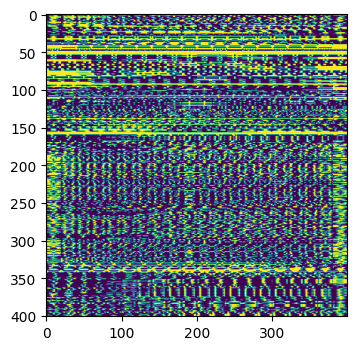

In [ ]:
plt.figure(dpi = 100)
plt.imshow(CL1.loc[0:400, 'r0c0': 'r19c19'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(CL1.shape, CL2.shape, CL3.shape)

(7994, 412) (8964, 412) (9440, 412)


In [ ]:
def output(n):
  a = (np.zeros([1, len(base_name)]))
  a[0, n - 1] = 1
  return a

In [ ]:
for value in np.arange(1, len(base_name) + 1).tolist():
  exec("CL{x} = CL{x}.loc[(CL{x}['strength'] == 0.4) & (CL{x}['italic'] == 0)]".format(x = value))
  exec("X_CL{x} = CL{x}.loc[:, 'r0c0': 'r19c19'].astype(int)".format(x = value))
  exec('Y_CL{x} = np.repeat(a = output({x}), repeats = len(CL{x}.index), axis = 0)'.format(x = value))
  exec('pd_CL{x} = np.random.choice(a = 2, size = len(CL{x}.index), replace = True, p = [0.80, 0.20])'.format(x = value))
  exec('train_CL{x} = CL{x}.loc[pd_CL{x} == 0]'.format(x = value))
  exec('test_CL{x} = CL{x}.loc[pd_CL{x} == 1]'.format(x = value))
  exec('Y_train_CL{x} = Y_CL{x}[1: (train_CL{x}.shape[0] + 1), :]'.format(x = value))
  exec('Y_test_CL{x} = Y_CL{x}[1: (test_CL{x}.shape[0] + 1), :]'.format(x = value))

for value in ['train', 'test']:
  exec("X_{x} = pd.concat([{x}_CL1, {x}_CL2, {x}_CL3], axis = 0).loc[:, 'r0c0': 'r19c19'].astype(int)".format(x = value))
  exec("y_{x} = pd.concat([{x}_CL1, {x}_CL2, {x}_CL3], axis = 0).loc[:, 'font']".format(x = value))
  exec('Y_{x} = np.concatenate([Y_{x}_CL1, Y_{x}_CL2, Y_{x}_CL3], axis = 0)'.format(x = value))

In [ ]:
print(Y_train.shape, Y_test.shape)
print(train_CL1.shape, train_CL2.shape, train_CL3.shape)
print(Y_train_CL1.shape, Y_train_CL2.shape, Y_train_CL3.shape)
print(test_CL1.shape, test_CL2.shape, test_CL3.shape)
print(Y_test_CL1.shape, Y_test_CL2.shape, Y_test_CL3.shape)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, y_test.shape)

(5253, 3) (1392, 3)
(1571, 412) (1814, 412) (1868, 412)
(1571, 3) (1814, 3) (1868, 3)
(428, 412) (471, 412) (493, 412)
(428, 3) (471, 3) (493, 3)
(5253, 400) (1392, 400) (5253, 3) (1392, 3) (1392,)


In [ ]:
X = pd.concat([CL1, CL2, CL3], axis = 0).loc[:, 'r0c0': 'r19c19'].astype(int)
X

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,1,1,33,113,212,231,209,209,251,255,255,255,215,1,1,1,1,1,1,1,1,91,237,246,102,28,1,1,52,224,255,255,215,1,1,1,...,1,1,22,224,255,255,111,1,1,1,1,1,1,111,255,255,224,22,1,1,209,209,226,255,255,255,248,209,209,99,99,209,209,248,255,255,255,226,209,209
1,1,1,1,1,1,1,1,46,140,180,221,209,209,231,157,118,11,1,1,1,1,1,1,1,1,6,148,254,223,77,16,1,1,28,245,255,185,28,1,1,...,1,1,18,207,255,255,154,2,1,1,1,1,1,28,245,255,255,107,1,1,209,209,223,255,255,255,255,210,209,152,1,136,209,231,255,255,255,248,209,209
2,1,1,1,28,115,204,191,31,1,9,118,255,255,255,204,115,28,1,1,1,1,11,122,253,247,137,6,1,1,181,255,173,86,92,225,255,253,122,11,1,...,1,1,1,1,1,1,1,1,132,255,232,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,132,255,232,1,1,1,1,1,1,1,1,1
3,1,1,1,1,128,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,20,160,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,1,1,1,1,1,1,1,1,7,122,255,255,255,255,255,255,160,20,1,1,1,1,1,1,1,1,1,1,1,39,96,224,255,255,160,96,1,1,1,1
4,1,1,1,1,41,96,210,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,5,123,219,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,1,1,1,19,101,246,251,133,64,64,87,242,255,155,28,1,1,1,1,1,1,1,1,1,1,82,119,255,255,255,255,164,96,14,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,1,92,163,163,163,163,42,1,1,1,1,1,1,1,1,1,1,1,21,163,145,73,1,1,1,1,143,75,1,1,1,1,1,1,1,1,1,46,255,1,...,1,255,46,1,1,1,1,1,1,1,1,1,63,121,1,1,1,1,71,113,163,21,1,1,1,1,1,1,1,1,1,1,1,42,163,163,163,163,92,1
8737,1,1,1,1,1,1,1,1,1,125,125,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,13,37,37,144,144,37,14,1,1,1,1,1,1,1,...,1,1,1,1,1,1,13,37,37,144,144,37,37,37,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,125,125,1,1,1,1,1,1,1,1,1
8738,1,1,1,1,60,178,1,1,1,1,1,1,1,1,178,60,1,1,1,1,1,1,1,1,60,178,1,1,1,1,1,1,1,1,178,60,1,1,1,1,...,1,1,1,1,60,178,1,1,1,1,1,1,1,1,178,60,1,1,1,1,1,1,1,1,60,178,1,1,1,1,1,1,1,1,178,60,1,1,1,1
8739,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,86,255,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,86,255,...,255,86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,255,86,1,1,255,86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,255,86,1,1


In [ ]:
y = pd.concat([CL1, CL2, CL3], axis = 0).loc[:, 'font']
y

0       CENTURY
1       CENTURY
2       CENTURY
3       CENTURY
4       CENTURY
         ...   
8736       ISOC
8737       ISOC
8738       ISOC
8739       ISOC
8740       ISOC
Name: font, Length: 6645, dtype: object

In [ ]:
Y = pd.DataFrame(np.concatenate([Y_CL1, Y_CL2, Y_CL3], axis = 0))
print(len(Y))
np.array(Y)

6645


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
#Y = np.concatenate( (np.tile(0,len(CL1.index)), np.tile(1,len(CL2.index)), np.tile(2, len(CL3.index)))  )
#Y = tf.keras.utils.to_categorical(Y, num_classes = 3)
#print(Y.shape)
#Y

In [ ]:
# split data set into a training set (80%) and a test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().fit(X_train)
X_train, X_test = std_scaler.transform(X_train), std_scaler.transform(X_test)

In [ ]:
from sklearn import *

In [ ]:
def x_pca(df, prop):
  # standardized dataset
  SX = preprocessing.scale(df) # from sklearn package
  # correlation matrix using method of pearson (standard correlation coefficient)
  R = df.corr(method = 'pearson').to_numpy()
  # D refers to eigenvalues, and W refers to eigenvectors
  D, Q = np.linalg.eig(R)
  s = abs(np.cumsum(D)/sum(D) - prop)
  p = s.tolist().index(sorted(s, reverse = False)[0]) + 1
  V = Q[:,0:p]
  X_pca = pd.DataFrame(data = np.dot(SX, V), # SX.dot(V)
                       index = df.index)
  return X_pca

In [ ]:
X_pca = x_pca(X, 0.95)
pc0 = X_pca.shape[1]
for value in np.arange(1, len(base_name) + 1).tolist():
  exec('X_CL{x}_pca = x_pca(X_CL{x}, 0.99)'.format(x = value))
  exec('pc{x} = X_CL{x}_pca.shape[1]'.format(x = value))

In [ ]:
h0, h1, h2, h3 = pc0, pc1, pc2, pc3
hmin, hmax = h0, sum([h1, h2, h3])
n_h0, n_hstar = hmin, hmax

In [ ]:
n_input, n_output = len(X.columns), len(base_name)

In [ ]:
print(n_input, n_output)

400 3


In [ ]:
n_batch = int((X_train.shape[0])**0.5)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks

In [ ]:
%load_ext tensorboard

In [ ]:
 # Clear any logs from previous runs
 #rm -rf ./logs/

In [ ]:
log_dir_0 = "logs/MLP_zero/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") # import datetime as dt
tensorboard_callback_0 = tf.keras.callbacks.TensorBoard(log_dir = log_dir_0, histogram_freq = 1)

In [ ]:
# monitor `val_accuracy`
checkpointer = callbacks.ModelCheckpoint(
    filepath = 'BestModel.h5', 
    monitor = 'val_accuracy', 
    save_best_only = True
    )

In [ ]:
model = Sequential()

model.add(keras.layers.Input(
    shape = (n_input, )
    ))

model.add(Dense(
    n_h0, 
    activation = 'relu'
    ))

# use `softmax` activation
model.add(Dense(
    n_output, 
    activation = 'softmax'
    ))

In [ ]:
model_summary = model.summary()
model_summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 103)               41303     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 312       
Total params: 41,615
Trainable params: 41,615
Non-trainable params: 0
_________________________________________________________________


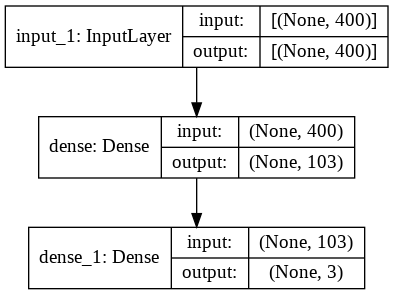

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True, show_layer_names = True)

In [ ]:
model(   np.array([X_train[102]])   )

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9078977 , 0.06429935, 0.027803  ]], dtype=float32)>

In [ ]:
np.array(Y_train.iloc[102,:])

array([0., 1., 0.])

In [ ]:
optimizer = optimizers.Adam(learning_rate = 0.001)

model.compile(
    optimizer = optimizer, 
    loss = losses.CategoricalCrossentropy(), 
    metrics = ['accuracy']
    )

In [ ]:
Monitor = model.fit(
    X_train, 
    Y_train, 
    epochs = 100, 
    batch_size = n_batch, 
    validation_data = (X_test, Y_test), 
    callbacks = [checkpointer, tensorboard_callback_0]
    )

Epoch 1/100
74/74 [==============================] - 1s 10ms/step - loss: 1.0115 - accuracy: 0.5618 - val_loss: 0.5893 - val_accuracy: 0.7547
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7826 - val_loss: 0.4969 - val_accuracy: 0.7931
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.8340 - val_loss: 0.4302 - val_accuracy: 0.8345
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8698 - val_loss: 0.3876 - val_accuracy: 0.8563
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8972 - val_loss: 0.3805 - val_accuracy: 0.8661
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.9052 - val_loss: 0.3480 - val_accuracy: 0.8706
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9154 - val_loss: 0.3160 - val_accuracy: 0.8909
Epoch 8/100


In [ ]:
val_loss = Monitor.history['val_loss']
train_loss = Monitor.history['loss']

# Overfitting if: training loss > validation loss
# Underfitting if: training loss < validation loss
# Perfect fitting if: training loss = validation loss
loss = pd.concat([pd.DataFrame(val_loss, columns = ['val_loss']), 
                  pd.DataFrame(train_loss, columns = ['train_loss']),
                  pd.DataFrame(np.subtract(train_loss, val_loss), columns = ['difference'])],
                 axis = 1
                 )
loss

,val_loss,train_loss,difference
0,0.589319,0.826774,0.237455
1,0.496880,0.536986,0.040106
2,0.430215,0.455620,0.025405
3,0.387643,0.373746,-0.013897
4,0.380456,0.329795,-0.050661
...,...,...,...
95,0.395932,0.056999,-0.338933
96,0.376653,0.048404,-0.328248
97,0.386212,0.045238,-0.340974
98,0.414099,0.047770,-0.366328


In [ ]:
%tensorboard --logdir logs/MLP_zero

<IPython.core.display.Javascript object>

In [ ]:
# overT = beginning time of overfit for cross-entropy loss that measured in number of epochs
overT = sum(loss[loss['difference'] > 0].index.values, 1) 

# stabT = time of stabilization for cross-entropy loss that measured in number of epochs
stabT = sum(loss[abs(loss['difference']) == sorted(abs(loss['difference']))[0]].index.values, 1)

# Tstop = optimal number of epochs
Tstop = min(overT, stabT)

print(stabT, overT, Tstop)

4 4 4


In [ ]:
model.evaluate(X_train,Y_train)

167/167 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9801


[0.04261113330721855, 0.9800602197647095]

In [ ]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [ ]:
Y_pred_test

array([[5.3146567e-05, 9.9994540e-01, 1.4085775e-06],
       [4.2187545e-01, 5.1362175e-01, 6.4502716e-02],
       [7.3168550e-05, 4.1886023e-18, 9.9992681e-01],
       ...,
       [4.3997308e-03, 4.2020123e-13, 9.9560022e-01],
       [1.0000000e+00, 6.4334810e-10, 7.5789999e-11],
       [4.6506615e-05, 1.6247272e-04, 9.9979109e-01]], dtype=float32)

In [ ]:
Ylabel_train = np.argmax(np.array(Y_train), axis = 1)
Ylabel_test = np.argmax(np.array(Y_test), axis = 1)

In [ ]:
Ypredlabel_train = np.argmax(Y_pred_train, axis = 1)
Ypredlabel_test = np.argmax(Y_pred_test, axis = 1)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
cm_train = confusion_matrix(Ylabel_train, Ypredlabel_train)
cm_train

array([[1549,   70,    0],
       [   4, 1803,    0],
       [   0,   32, 1858]])

In [ ]:
trainperf0 = np.sum(np.diag(cm_train)) / np.sum(cm_train) # total percentage of correct classifications for train set
trainperf0

0.9800601956358164

In [ ]:
cm_test = confusion_matrix(Ylabel_test, Ypredlabel_test) 
cm_test

array([[341,  25,  14],
       [ 38, 424,  16],
       [  4,   9, 458]])

In [ ]:
testperf0 = np.sum(np.diag(cm_test)) / np.sum(cm_test) # total percentage of correct classifications for test set
testperf0

0.9202407825432656

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize = False,
                          title = None,
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (16,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap, vmin = 0, vmax = 1)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
             rotation_mode = "anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
classes = np.array(list(range(n_output)))

Normalized confusion matrix
[[0.95676343 0.04323657 0.        ]
 [0.00221361 0.99778639 0.        ]
 [0.         0.01693122 0.98306878]]


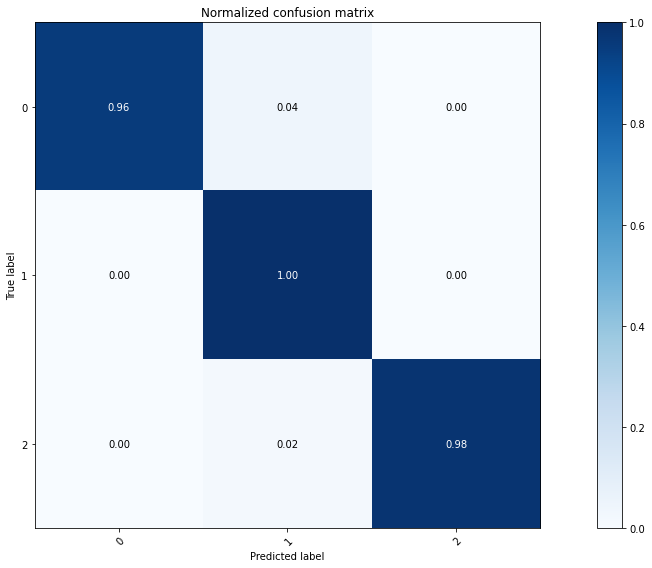

In [ ]:
plot_confusion_matrix(Ylabel_train, Ypredlabel_train, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.89736842 0.06578947 0.03684211]
 [0.07949791 0.88702929 0.0334728 ]
 [0.00849257 0.01910828 0.97239915]]


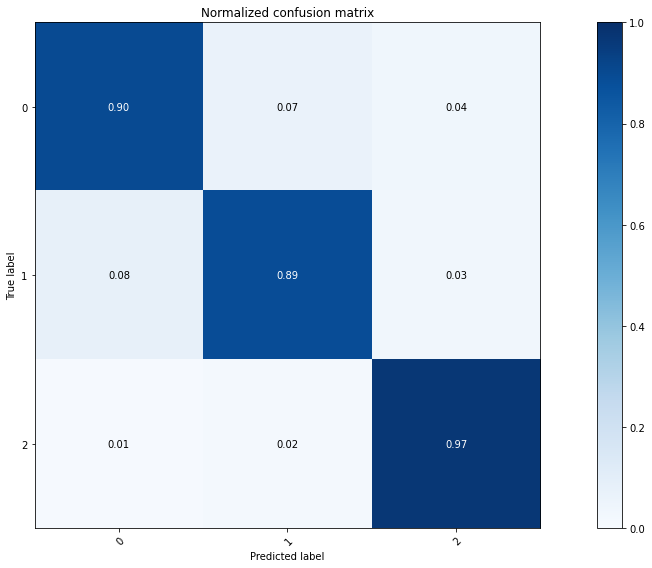

In [ ]:
plot_confusion_matrix(Ylabel_test, Ypredlabel_test, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

In [ ]:
# Sparsity Learning when hidden layer size is in a high dimension (it's greater than import layer size)

In [ ]:
%reload_ext tensorboard

In [ ]:
#log_dir = "logs/fit1/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") # import datetime as dt
#tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

In [ ]:
from tensorflow.keras import layers

In [ ]:
class SparsityRegularizationLayer(layers.Layer):
  def __init__(self, C = 0.01, Tar = 0.01, **kwargs):
    super().__init__(**kwargs)
    self.C = C
    self.Tar = Tar
  def call(self, inputs):
    """
    minimize mixed cost function over all weights/biases W
    cost(W) = MSE + constant * CrossEnt(p, q)

    CrossEnt(p, q) = -q * log(p) + (q - 1) * log(1 - p) 
    
    where p = avAL = Average hidden activity level that depends on W (vector of weights & biases), 
    and q = TAR = fix small target activity level that is constant, such as 10%, 20%, ...

    """
    avAL = tf.reduce_mean(inputs)
    self.add_loss(  self.C * (  -1*self.Tar*tf.math.log(avAL) + (self.Tar-1)*tf.math.log(1-avAL)  )  )
    return inputs
  def get_config(self):
    config = super().get_config().copy()
    config.update({
        'C': self.C,
        'Tar': self.Tar,
        })
    return config

In [ ]:
tar1 = round(n_input/n_hstar, 1)
from random import sample
tar2 = round(sample(list(np.arange(0 + 0.1, tar1 - 0.1, 0.1)), k = 1)[0], 1)
TAR = [tar1, tar2]
for sparsity_level in TAR:
  optimizer = optimizers.Adam()
  loss_fn = keras.losses.SparseCategoricalCrossentropy()
  checkpoint = callbacks.ModelCheckpoint(filepath = 'BestModel', monitor = 'val_accuracy', save_best_only = True)

  exec("log_dir_{x} = 'logs/MLP_star/MLP_star_TAR{x}/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S')".format(x = str(sparsity_level).replace('.', ''))) # remember to import datetime as dt if you didn't
  exec('tensorboard_callback_{x} = tf.keras.callbacks.TensorBoard(log_dir = log_dir_{x}, histogram_freq = 1)'.format(x = str(sparsity_level).replace('.', '')))

  inputs = keras.Input(shape = (n_input, ))
  x1 = layers.Dense(n_hstar, activation = "sigmoid")(inputs)
  exec('x1 = SparsityRegularizationLayer(C = 0.01, Tar = {x})(x1)'.format(x = sparsity_level))
  outputs = layers.Dense(n_output, activation = "softmax")(x1)
  exec("model_star_{x} = keras.Model(inputs = inputs, outputs = outputs)".format(x = str(sparsity_level).replace('.', '')))

  exec("model_star_{x}.compile(optimizer = optimizer, loss = loss_fn, metrics = ['accuracy'])".format(x = str(sparsity_level).replace('.', '')))

  exec('Monitor_{x} = model_star_{x}.fit(X_train, Ylabel_train, epochs = 50, batch_size = n_batch, validation_data = (X_test, Ylabel_test), callbacks = [checkpoint, tensorboard_callback_{x}])'.format(x = str(sparsity_level).replace('.', '')))

  exec('Ypred_test_{x} = model_star_{x}.predict(X_test)'.format(x = str(sparsity_level).replace('.', '')))
  exec('Ypredlabel_test_{x} = np.argmax(Ypred_test_{x}, axis = 1)'.format(x = str(sparsity_level).replace('.', '')))

  exec('cm_test_{x} = confusion_matrix(Ylabel_test, Ypredlabel_test_{x})'.format(x = str(sparsity_level).replace('.', '')))
  exec('testperf_{x} = np.sum(np.diag(cm_test_{x})) / np.sum(cm_test_{x})'.format(x = str(sparsity_level).replace('.', '')))

Epoch 1/50
74/74 [==============================] - 1s 8ms/step - loss: 0.9328 - accuracy: 0.5871 - val_loss: 0.7238 - val_accuracy: 0.7035
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 0.7027 - accuracy: 0.7136 - val_loss: 0.6757 - val_accuracy: 0.7208
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 3/50
74/74 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.7555 - val_loss: 0.6087 - val_accuracy: 0.7592
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 4/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7583 - val_loss: 0.5649 - val_accuracy: 0.7856
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 5/50
74/74 [==============================] - 0s 5ms/step - loss: 0.5146 - accuracy: 0.8092 - val_loss: 0.5616 - val_accuracy: 0.7758
Epoch 6/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0

In [ ]:
t = []
for i in range(len(TAR)):
  testperf = eval('testperf_{x}'.format(x = str(TAR[i]).replace('.', '')))
  t.append(testperf)
TAR_best = TAR[ np.where(max(t))[0].tolist()[0] ]
print(TAR_best) 

0.7


In [ ]:
model_best = eval('model_star_{x}'.format(x = str(TAR_best).replace('.', '')))

In [ ]:
model_best.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 602)               241402    
_________________________________________________________________
sparsity_regularization_laye (None, 602)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1809      
Total params: 243,211
Trainable params: 243,211
Non-trainable params: 0
_________________________________________________________________


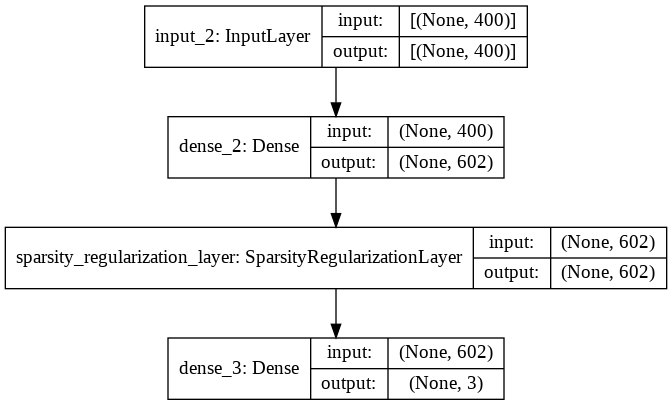

In [ ]:
plot_model(model = model_best, show_shapes = True, show_layer_names = True)

In [ ]:
Monitor_best = eval('Monitor_{x}'.format(x = str(TAR_best).replace('.', '')))

In [ ]:
# W_best_Tstop = model_best.layers[1].get_weights() # learn weights & biases
# W_best_Tstop

In [ ]:
val_loss = Monitor_best.history['val_loss']
train_loss = Monitor_best.history['loss']

# Overfitting if: training loss > validation loss
# Underfitting if: training loss < validation loss
# Perfect fitting if: training loss = validation loss
loss = pd.concat([pd.DataFrame(val_loss, columns = ['val_loss']), 
                  pd.DataFrame(train_loss, columns = ['train_loss']),
                  pd.DataFrame(np.subtract(train_loss, val_loss), columns = ['difference'])],
                 axis = 1)

In [ ]:
%tensorboard --logdir logs/MLP_star

<IPython.core.display.Javascript object>

In [ ]:
# overT = beginning time of overfit for cross-entropy loss that measured in number of epochs
overT = sum(loss[loss['difference'] > 0].index.values, 1) 

# stabT = time of stabilization for cross-entropy loss that measured in number of epochs
stabT = sum(loss[abs(loss['difference']) == sorted(abs(loss['difference']))[0]].index.values, 1)

# Tstop = optimal number of epochs
Tstop = min(overT, stabT)

print(stabT, overT, Tstop)

4 7 4


In [ ]:
model_best.evaluate(X_train, Ylabel_train)

167/167 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9831


[0.05004001781344414, 0.9830699563026428]

In [ ]:
Ypred_train = model_best.predict(X_train)
Ypred_test = model_best.predict(X_test)
Ypred_test

array([[1.5766901e-03, 9.9628699e-01, 2.1363033e-03],
       [6.1400020e-01, 2.0905891e-01, 1.7694083e-01],
       [2.1667823e-03, 2.4371824e-04, 9.9758947e-01],
       ...,
       [1.1496454e-04, 5.4113730e-06, 9.9987960e-01],
       [9.9999511e-01, 1.7532893e-06, 3.1399077e-06],
       [2.4447322e-03, 3.4373526e-03, 9.9411798e-01]], dtype=float32)

In [ ]:
Ypred_label_train = np.argmax(Ypred_train, axis = 1)
Ypred_label_test = np.argmax(Ypred_test, axis = 1)

In [ ]:
cm_train = confusion_matrix(Ylabel_train, Ypred_label_train)
cm_train

array([[1608,   11,    0],
       [  47, 1760,    0],
       [  32,    0, 1858]])

In [ ]:
trainperf_star1 = np.sum(np.diag(cm_train)) / np.sum(cm_train) # total percentage of correct classifications for train set
trainperf_star1

0.9830699774266366

In [ ]:
cm_test = confusion_matrix(Ylabel_test, Ypred_label_test)
cm_test

array([[355,  17,   8],
       [ 41, 425,  12],
       [  8,   5, 458]])

In [ ]:
testperf_star1 = np.sum(np.diag(cm_test)) / np.sum(cm_test) # total percentage of correct classifications for test set
testperf_star1

0.9315274642588413

In [ ]:
whole_data = pd.concat([pd.DataFrame(X_test, index = Y_test.index), 
                        pd.DataFrame(X_train, index = Y_train.index)]
                       ).sort_index().to_numpy()
av_j = np.mean(model_best.layers[0](whole_data).numpy(), axis = 0)
av_j = pd.DataFrame(data = av_j, 
                    index = np.arange(1, av_j.shape[0] + 1, 1), 
                    columns = ['avg_activity']
                    )

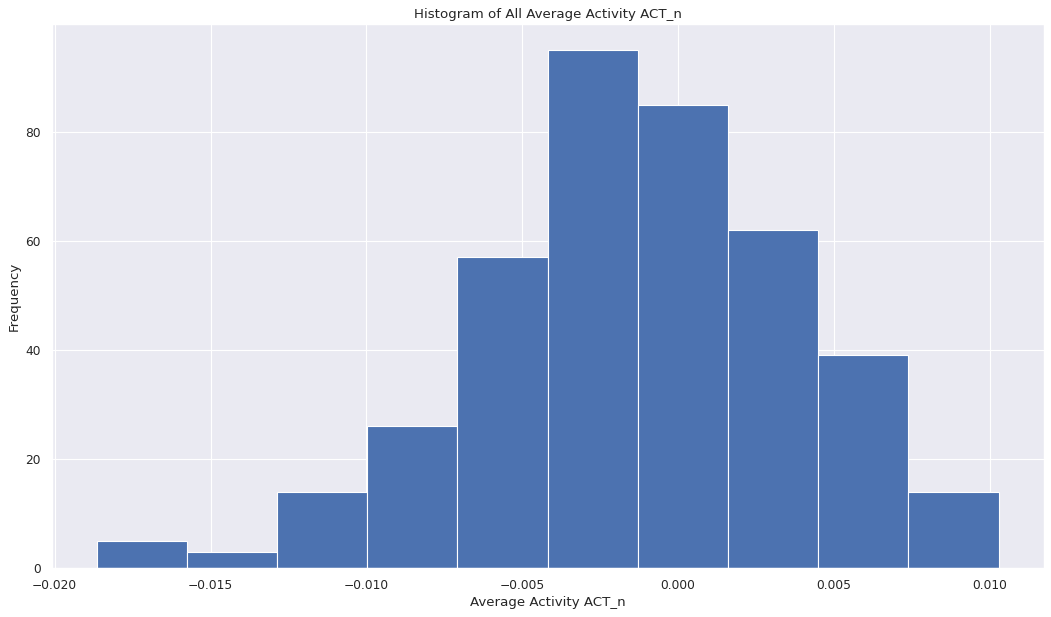

In [ ]:
import seaborn as sns
plt.figure(figsize = (16, 9), dpi = 80)
sns.set()
plt.hist(np.array(av_j), bins = 10)
plt.xlabel('Average Activity ACT_n')
plt.ylabel('Frequency')
plt.title('Histogram of All Average Activity ACT_n')
plt.show()

In [ ]:
avact, stdact = float(np.mean(av_j)), float(np.std(av_j))

In [ ]:
avact

-0.0013661894481629133

In [ ]:
stdact

0.005169197916984558

In [ ]:
def per(n): # empirical_sparsity
  return sum(map(lambda i: i < avact * (n), av_j.iloc[:, 0].tolist())) / av_j.shape[0]

In [ ]:
per(1/2)

0.5525

In [ ]:
per(1/3)

0.5675

In [ ]:
# autoencoding

In [ ]:
%reload_ext tensorboard

In [ ]:
Z_test = model_best.layers[1](X_test).numpy()
Z_test

array([[6.9476563e-01, 9.6972275e-01, 9.8545325e-01, ..., 8.4792119e-01,
        3.8798678e-01, 9.7587860e-01],
       [9.9999464e-01, 4.7475904e-01, 1.9262223e-09, ..., 6.1519742e-03,
        1.6012266e-01, 9.9997365e-01],
       [1.3869703e-03, 9.1290534e-02, 9.9637544e-01, ..., 8.1405765e-01,
        9.4865441e-01, 1.3459116e-02],
       ...,
       [3.3755839e-02, 1.0991362e-01, 9.5112872e-01, ..., 6.1365050e-01,
        9.8490673e-01, 3.2350421e-04],
       [4.8426360e-02, 5.1017141e-01, 9.3680155e-01, ..., 6.2030745e-01,
        2.5573391e-01, 1.2595981e-02],
       [3.5032088e-01, 1.4261124e-01, 9.4194627e-01, ..., 7.5615108e-02,
        6.3481271e-01, 9.9965012e-01]], dtype=float32)

In [ ]:
Z_test.shape

(1329, 602)

In [ ]:
Z_train = model_best.layers[1](X_train).numpy()

In [ ]:
Z = pd.concat([pd.DataFrame(Z_test, index = Y_test.index), 
               pd.DataFrame(Z_train, index = Y_train.index)]
              )

In [ ]:
def Z_pca(df, prop = 0.95):
  R = Z.corr(method = 'pearson').to_numpy()
  D, Q = np.linalg.eig(R)
  s = abs(np.cumsum(D)/sum(D) - prop)
  p = s.tolist().index(sorted(s, reverse = False)[0]) + 1
  V = Q[:,0:p]
  return pd.DataFrame(data = np.dot(Z, V))

In [ ]:
Z_pca = Z_pca(Z)
s = Z_pca.shape[1]
s

170

In [ ]:
inputs = keras.Input(shape = (n_hstar, ))

x1 = layers.Dense(s, activation = "sigmoid")(inputs)

outputs = layers.Dense(n_hstar, activation = "sigmoid")(x1)

autoEncoder = keras.Model(inputs = inputs, outputs = outputs)

autoEncoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 602)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 170)               102510    
_________________________________________________________________
dense_7 (Dense)              (None, 602)               102942    
Total params: 205,452
Trainable params: 205,452
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_fn = keras.losses.MeanSquaredError()
autoEncoder.compile(optimizer = optimizer, loss = loss_fn)

In [ ]:
checkpoint = callbacks.ModelCheckpoint(filepath = 'BestModel', monitor = 'val_loss', save_best_only = True)

log_dir_autoEncoder = "logs/autoEncoder/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") # import datetime as dt
tensorboard_callback_autoEncoder = tf.keras.callbacks.TensorBoard(log_dir = log_dir_autoEncoder, histogram_freq = 1)

Monitor = autoEncoder.fit(Z_train, Z_train, epochs = 100, batch_size = n_batch, validation_data = (Z_test, Z_test), callbacks = [checkpoint, tensorboard_callback_autoEncoder])

Epoch 1/100
74/74 [==============================] - 1s 8ms/step - loss: 0.1103 - val_loss: 0.0503
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 2/100
74/74 [==============================] - 0s 5ms/step - loss: 0.0451 - val_loss: 0.0344
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 3/100
74/74 [==============================] - 0s 5ms/step - loss: 0.0327 - val_loss: 0.0281
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 4/100
74/74 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.0242
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 5/100
74/74 [==============================] - 0s 5ms/step - loss: 0.0232 - val_loss: 0.0213
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 6/100
74/74 [==============================] - 0s 4ms/step - loss: 0.0203 - val_loss: 0.0192
INFO:tensorflow:Assets written to: BestModel/assets
Epoch 7/100
74/74 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.

In [ ]:
from tensorflow.keras.models import load_model

autoEncoder = load_model('BestModel')

In [ ]:
autoEncoder.evaluate(Z_train, Z_train)

167/167 [==============================] - 0s 1ms/step - loss: 0.0033


0.003291324945166707

In [ ]:
val_loss = Monitor.history['val_loss']
train_loss = Monitor.history['loss']

# Overfitting if: training loss > validation loss
# Underfitting if: training loss < validation loss
# Perfect fitting if: training loss = validation loss
loss = pd.concat([pd.DataFrame(val_loss, columns = ['val_loss']), 
                  pd.DataFrame(train_loss, columns = ['train_loss']),
                  pd.DataFrame(np.subtract(train_loss, val_loss), columns = ['difference'])],
                 axis = 1
                 )
loss

,val_loss,train_loss,difference
0,0.050285,0.081750,0.031465
1,0.034430,0.041319,0.006889
2,0.028069,0.031046,0.002978
3,0.024153,0.025903,0.001750
4,0.021312,0.022444,0.001132
...,...,...,...
95,0.004422,0.003437,-0.000985
96,0.004425,0.003414,-0.001011
97,0.004389,0.003412,-0.000977
98,0.004334,0.003380,-0.000954


In [ ]:
performance = np.mean(np.concatenate((val_loss, train_loss), axis = 0)**0.5) / np.mean(((Z**2).sum())**0.5)
performance

0.0016290776735537597

In [ ]:
%tensorboard --logdir logs/autoEncoder

<IPython.core.display.Javascript object>

In [ ]:
val_rmse = np.sqrt(val_loss)

In [ ]:
train_rmse = np.sqrt(train_loss)

In [ ]:
(np.sum(Z_test**2))**0.5

577.5389867792477

In [ ]:
Y_pred_train = autoEncoder.predict(Z_train)
Y_pred_test = autoEncoder.predict(Z_test)

In [ ]:
print(Y_pred_test.shape)
print(Y_pred_train.shape)

(1329, 602)
(5316, 602)


In [ ]:
predlabel_train = np.argmax(Y_pred_train, axis = 1)
predlabel_test = np.argmax(Y_pred_test, axis = 1)
predlabel_test

array([172,  19, 323, ..., 301, 538, 360])

In [ ]:
inputs = keras.Input(shape = (n_input, ))

x1 = layers.Dense(n_hstar, activation = "sigmoid")(inputs)
x1 = SparsityRegularizationLayer()(x1)

outputs = layers.Dense(s, activation = "sigmoid")(x1)

model_new = keras.Model(inputs = inputs, outputs = outputs)

model_new.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 602)               241402    
_________________________________________________________________
sparsity_regularization_laye (None, 602)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 170)               102510    
Total params: 343,912
Trainable params: 343,912
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_new.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
checkpoint = callbacks.ModelCheckpoint(filepath = 'BestModel_K_n', monitor = 'val_loss', save_best_only = True)
Monitor = model_new.fit(X_train, Ylabel_train, epochs = 50, batch_size = n_batch, validation_data = (X_test, Ylabel_test), callbacks = [checkpoint])

Epoch 1/50
74/74 [==============================] - 1s 8ms/step - loss: 1.3814 - accuracy: 0.5825 - val_loss: 0.6295 - val_accuracy: 0.7464
INFO:tensorflow:Assets written to: BestModel_K_n/assets
Epoch 2/50
74/74 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.7552 - val_loss: 0.5640 - val_accuracy: 0.7795
INFO:tensorflow:Assets written to: BestModel_K_n/assets
Epoch 3/50
74/74 [==============================] - 0s 6ms/step - loss: 0.4880 - accuracy: 0.8085 - val_loss: 0.4651 - val_accuracy: 0.8209
INFO:tensorflow:Assets written to: BestModel_K_n/assets
Epoch 4/50
74/74 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8417 - val_loss: 0.4183 - val_accuracy: 0.8427
INFO:tensorflow:Assets written to: BestModel_K_n/assets
Epoch 5/50
74/74 [==============================] - 0s 6ms/step - loss: 0.3356 - accuracy: 0.8816 - val_loss: 0.3790 - val_accuracy: 0.8540
INFO:tensorflow:Assets written to: BestModel_K_n/assets
Epoch 6/50
74/74 [==

In [ ]:
K_n_train = model_new.predict(X_train)
K_n_test = model_new.predict(X_test)

In [ ]:
K_n = pd.concat([pd.DataFrame(K_n_test, index = Y_test.index), 
                 pd.DataFrame(K_n_train, index = Y_train.index)]
                )
np.array(K_n)

array([[9.99530852e-01, 9.99998271e-01, 9.99433458e-01, ...,
        3.50502251e-06, 2.46691707e-06, 2.55180953e-06],
       [1.00000000e+00, 9.99999642e-01, 9.99999881e-01, ...,
        5.47963310e-08, 1.45667665e-08, 6.71551561e-08],
       [9.99493778e-01, 9.98599231e-01, 9.99999285e-01, ...,
        1.56843053e-05, 7.78814410e-06, 5.12607448e-06],
       ...,
       [1.00000000e+00, 9.81463075e-01, 9.98946905e-01, ...,
        6.12442182e-06, 2.71463114e-06, 1.92329753e-06],
       [9.99955058e-01, 1.00000000e+00, 9.99991179e-01, ...,
        1.09362134e-06, 6.40073097e-07, 7.68234258e-07],
       [9.99967337e-01, 1.00000000e+00, 9.99948025e-01, ...,
        1.13760177e-06, 5.51453468e-07, 8.75008027e-07]], dtype=float32)

In [ ]:
K_n.shape

(6645, 170)

In [ ]:
inputs = keras.Input(shape = (s, ))

outputs = layers.Dense(n_output, activation = "softmax")(inputs)

model_new1 = keras.Model(inputs = inputs, outputs = outputs)

model_new1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 170)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_new1.compile(optimizer = optimizer, loss = losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
Monitor = model_new1.fit(K_n_train, Y_train, epochs = 100, batch_size = n_batch, validation_data = (K_n_test, Y_test))

Epoch 1/100
74/74 [==============================] - 1s 4ms/step - loss: 1.1011 - accuracy: 0.3457 - val_loss: 1.0943 - val_accuracy: 0.3604
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.3564 - val_loss: 1.0933 - val_accuracy: 0.3544
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 1.0954 - accuracy: 0.3650 - val_loss: 1.0932 - val_accuracy: 0.4394
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 1.0959 - accuracy: 0.3687 - val_loss: 1.0937 - val_accuracy: 0.3544
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0.3538 - val_loss: 1.0938 - val_accuracy: 0.3544
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 1.0951 - accuracy: 0.3594 - val_loss: 1.0933 - val_accuracy: 0.3544
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 1.0956 - accuracy: 0.3621 - val_loss: 1.0931 - val_accuracy: 0.3544
Epoch 8/100
7

In [ ]:
# len(X.columns)*n_hidden matrix of weights of arrow w(j,k) from input layer to hidden layer
W_new1 = model_new1.layers[1].get_weights()[0] # learn weights & biases
W_new1

array([[ 0.09049215, -0.18790932,  0.16544954],
       [-0.01138285,  0.63232315, -0.90096086],
       [-0.2673665 , -0.3717411 ,  0.28836432],
       [-0.8383364 , -7.265234  ,  6.918959  ],
       [-3.6068337 , -6.0825553 ,  6.4151764 ],
       [-2.7569938 , -7.1085954 ,  7.0194893 ],
       [ 3.7376301 , -4.7488422 ,  1.8641113 ],
       [-3.9166167 , -6.016546  ,  6.3121557 ],
       [ 2.4783998 , -4.3982444 ,  2.5279174 ],
       [-3.280093  , -7.3438654 ,  7.2518787 ],
       [-3.2851284 , -6.064815  ,  6.319319  ],
       [-4.8590403 , -6.9857893 ,  7.2078314 ],
       [ 1.7144487 , -7.1983976 ,  6.5747213 ],
       [-3.0368135 , -6.6737847 ,  6.584144  ],
       [-5.5076656 , -7.225498  ,  7.1304626 ],
       [-0.33753937, -7.275839  ,  6.6794806 ],
       [-1.6668656 , -5.172963  ,  5.2725196 ],
       [-0.8025217 , -6.058722  ,  5.666825  ],
       [ 1.1833829 , -4.2402744 ,  3.4095569 ],
       [-3.6885197 , -6.04115   ,  6.370426  ],
       [-2.873262  , -7.563503  ,  7.336

In [ ]:
W_new1.shape

(170, 3)

In [ ]:
inputs = keras.Input(shape = (n_input, ))

x1 = layers.Dense(n_hstar, activation = "sigmoid")(inputs)
x1 = SparsityRegularizationLayer()(x1)

x2 = layers.Dense(s, activation = 'sigmoid')(x1)

outputs = layers.Dense(n_output, activation = "softmax")(x2)

model_best1 = keras.Model(inputs = inputs, outputs = outputs)

model_best1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 602)               241402    
_________________________________________________________________
sparsity_regularization_laye (None, 602)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 170)               102510    
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 513       
Total params: 344,425
Trainable params: 344,425
Non-trainable params: 0
_________________________________________________________________


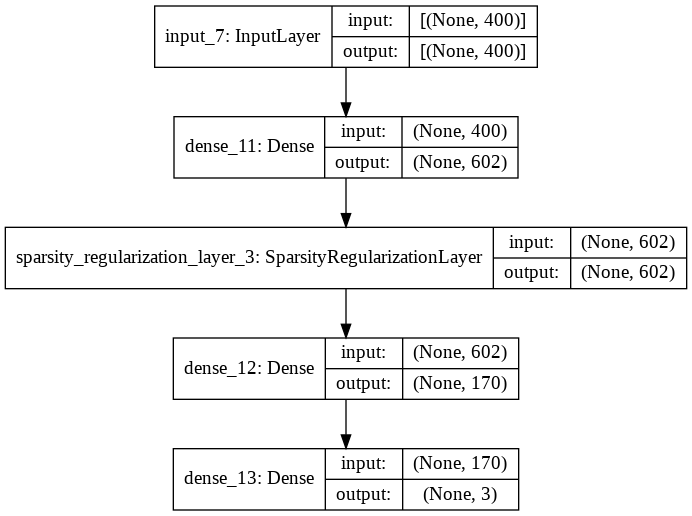

In [ ]:
plot_model(model = model_best1, show_shapes = True, show_layer_names = True)

In [ ]:
model_best1.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
checkpoint = callbacks.ModelCheckpoint(filepath = 'BestModel_1', monitor = 'val_loss', save_best_only = True)
Monitor = model_best1.fit(X_train, Ylabel_train, epochs = 100, batch_size = n_batch, validation_data = (X_test, Ylabel_test), callbacks = [checkpoint])

Epoch 1/100
74/74 [==============================] - 1s 8ms/step - loss: 0.9417 - accuracy: 0.5903 - val_loss: 0.6252 - val_accuracy: 0.7299
INFO:tensorflow:Assets written to: BestModel_1/assets
Epoch 2/100
74/74 [==============================] - 0s 6ms/step - loss: 0.5921 - accuracy: 0.7533 - val_loss: 0.5212 - val_accuracy: 0.7713
INFO:tensorflow:Assets written to: BestModel_1/assets
Epoch 3/100
74/74 [==============================] - 0s 6ms/step - loss: 0.4908 - accuracy: 0.7920 - val_loss: 0.4402 - val_accuracy: 0.8157
INFO:tensorflow:Assets written to: BestModel_1/assets
Epoch 4/100
74/74 [==============================] - 0s 6ms/step - loss: 0.3839 - accuracy: 0.8428 - val_loss: 0.3889 - val_accuracy: 0.8457
INFO:tensorflow:Assets written to: BestModel_1/assets
Epoch 5/100
74/74 [==============================] - 0s 6ms/step - loss: 0.3140 - accuracy: 0.8764 - val_loss: 0.3367 - val_accuracy: 0.8811
INFO:tensorflow:Assets written to: BestModel_1/assets
Epoch 6/100
74/74 [======

In [ ]:
Ypred_train_star2 = model_best1.predict(X_train)
Ypred_test_star2 = model_best1.predict(X_test)
Ypredlabel_train_star2 = np.argmax(Ypred_train_star2, axis = 1)
Ypredlabel_test_star2 = np.argmax(Ypred_test_star2 , axis = 1)

In [ ]:
cm_test_star2 = confusion_matrix(Ylabel_test, Ypredlabel_test_star2) 
cm_train_star2 = confusion_matrix(Ylabel_train, Ypredlabel_train_star2) 

In [ ]:
testperf_star2 = np.sum(np.diag(cm_test_star2)) / np.sum(cm_test_star2)
trainperf_star2 = np.sum(np.diag(cm_train_star2)) / np.sum(cm_train_star2)

In [ ]:
print(testperf0)
print(testperf_star1) 
print(testperf_star2)

0.9202407825432656
0.9315274642588413
0.9179834462001505


In [ ]:
print(trainperf0)
print(trainperf_star1)
print(trainperf_star2)

0.9800601956358164
0.9830699774266366
0.9838224228743416


In [ ]:
t1_stop = process_time()
print(f"\nElapsed time (mins): {(t1_stop - t1_start)/60:.6f}")


Elapsed time (mins): 6.156203
